In [14]:
# Import required libraries
import os
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt
from pathlib import Path
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email.mime.base import MIMEBase
from email.utils import COMMASPACE, formatdate
from email import encoders


In [15]:


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')


In [16]:
# Connects to your computer's default camera
# floor_08.mp4 **** Water Dance_720p.mp4 *** floor_08_20_10_2021.mp4

# capVideo = cv2.VideoCapture('floor_08.mp4')
capVideo= cv2.VideoCapture('floor_02.mp4')
teamPic = cv2.imread('pclink_team.jpg',0)
teamPic = cv2.resize(teamPic, (960, 540))   

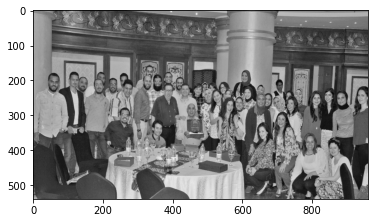

In [17]:
plt.imshow(teamPic,cmap='gray')

create send mail or email method 

method detect image

In [18]:
def detect_face_img(img):
    face_img = img.copy()
    face_result = face_cascade.detectMultiScale(face_img,1.05,5)
    countFace=0
    for (x,y,w,h) in face_result:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(0,225,0),3)
        countFace=1+countFace
    
    cv2.putText(face_img, 'total Face Numbers: '+ str(countFace), (20, 50),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 225, 0), 2)   
    nameImage ='img_total_face.jpg'           
    cv2.imwrite(nameImage,face_img)                 
    return face_img    

In [19]:
result = detect_face_img(teamPic)

In [20]:
# plt.imshow(result,cmap='gray')

while True:
    cv2.imshow("image",result)
    if cv2.waitKey(1) & 0xFF ==27:
        break    
cv2.destroyAllWindows()   

In [21]:
send_from = 'pclinkdevai@gmail.com'
username = 'PclinkDev Ai'
password = 'pclinkDev2020'
send_to = 'mohamed.zaytoun@pclink-alx.com' 
subject = 'find persion at night'
server= 'smtp.gmail.com'
body_mail = 'Python Capture picture of people\n please,check the attachment file'
file_paths = 'D:/python_ai/OpenCV_FaceCounter/data/result_pic/img_total_face.jpg'
file_name='img_total_face.jpg'

In [22]:
def send_mail(send_from, send_to, subject, message_body, file_path='',
            password='',file_name='img_total_face.jpg',
              use_tls=True):

    fromaddr =send_from
    toaddr = send_to
    
    # instance of MIMEMultipart
    msg = MIMEMultipart()
    
    # storing the senders email address  
    msg['From'] = fromaddr
    
    # storing the receivers email address 
    msg['To'] = toaddr
    
    # storing the subject 
    msg['Subject'] =subject
    
    # string to store the body of the mail
    body =message_body

    # attach the body with the msg instance
    msg.attach(MIMEText(body, 'plain'))
    
    # open the file to be sent
    filename = file_name
    attachment = open(file_path, "rb")
    
    # instance of MIMEBase and named as p
    p = MIMEBase('application', 'octet-stream')
    
    # To change the payload into encoded form
    p.set_payload((attachment).read())
    
    # encode into base64
    encoders.encode_base64(p)
    
    p.add_header('Content-Disposition', "attachment; filename= %s" % filename)
    
    # attach the instance 'p' to instance 'msg'
    msg.attach(p)
    
    # creates SMTP session
    s = smtplib.SMTP('smtp.gmail.com', 587)
    
    # start TLS for security
    s.starttls()
    
    # Authentication
    s.login(fromaddr, password)
    
    # Converts the Multipart msg into a string
    text = msg.as_string()
    
    # sending the mail
    s.sendmail(fromaddr, send_to, text)
    
    # terminating the session
    s.quit()

In [23]:
# send email to another user 
send_mail(
send_from= send_from,
subject=subject,
message_body=body_mail,
send_to= send_to,
password=password,
file_name=file_name,
file_path=file_paths)

In [24]:
type(capVideo)

cv2.VideoCapture

In [25]:
# Detect the coordinates
detector = dlib.get_frontal_face_detector()
img=0
width_v  = capVideo.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
height_v = capVideo.get(cv2.CAP_PROP_FRAME_HEIGHT)  # float `height`

In [26]:
type(width_v)

float

In [27]:
# Capture frames continuously
while True:
 
    # Capture frame-by-frame
    ret, frame = capVideo.read()
    #frame = cv2.flip(frame, 1)

    frame = cv2.resize(frame, (int(width_v*0.7), int(height_v*0.7)))
    # RGB to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,5)
    img=img+1 
    # Iterator to count faces
    i = 0

    for (x,y,w,h) in faces:
 
        # Get the coordinates of faces
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]      
       
        # Increment iterator for each face in faces
        i = i+1
        # Display the box and faces
        cv2.putText(frame, 'Face Number.'+str(i), (x-10, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        # print(face, i)
         # if video is still left continue creating images
        name = 'D:/python_ai/OpenCV_FaceCounter/data/' +'img_'+ str(img)+'_face_'+str(i) + '.jpg'
        # print ('Creating...' + name)
        # writing the extracted images
        cv2.imwrite(name, frame)
    # Display the resulting frame
    cv2.imshow('frame', frame)
    
    # This command let's us quit with the "q" button on a keyboard.
    if cv2.waitKey(60) & 0xFF == ord('q'):
        break

# Release the capture and destroy the windows
capVideo.release()
cv2.destroyAllWindows()